# <span style='color:red'>Feature Scaling in Machine Mearning
- Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.
-  If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.
## <span style='color:blue'>Example: 
- If an algorithm is not using the feature scaling method then it can consider the value 3000 meters to be greater than 5 km but that’s actually not true and in this case, the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to the same magnitudes and thus, tackle this issue.

## <span style='color:yellow'>Techniques to perform Feature Scaling
  - Consider the two most important ones:

   ## <span style='color:green'>1. Standardization: 
   - It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.
    - `X_{\text {new }}=\frac{X_{i}-X_{\text {mean }}}{\text { Standard Deviation }}`
    - 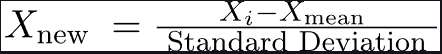
    
   ##  <span style='color:green'>2. Normalization: 
       ###  <span style='color:green'>1. Min-Max Normalization:
   - This technique re-scales a feature or observation value with distribution value between 0 and 1.
   - `X_{\text {new }}=\frac{X_{i}-\min (X)}{\max (x)-\min (X)}`

   - 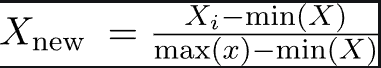

In [1]:
# load data
import seaborn as sns
df = sns.load_dataset("titanic") 

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# fill na values first
int(df['age'].mean())
df['age']=df['age'].fillna(int(df['age'].mean())).astype(int)

In [3]:
# df.info()
x= df[['age','fare']]

In [4]:
x.head()

,age,fare
0,22,7.2500
1,38,71.2833
2,26,7.9250
3,35,53.1000
4,35,8.0500


#### **Note:** Do the 'Train Test Split' before applying feature scaling in both the term Standerdization/Normalization

   ## <span style='color:green'>1. Standardization: 

In [5]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

In [6]:
sd.fit(x)
x_scaled = sd.fit_transform(x)

#### **Note:** StandardScaler take input as numpy array as well Pandas Dataframe but return only as numpy array

In [7]:
x_scaled

array([[-0.58004441, -0.50244517],
       [ 0.65011226,  0.78684529],
       [-0.27250525, -0.48885426],
       ...,
       [-0.04185087, -0.17626324],
       [-0.27250525, -0.04438104],
       [ 0.18880351, -0.49237783]])

####  <span style='color:green'>converting numpy array to pandas dataframe

In [8]:
import pandas as pd
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,age,fare
0,-0.580044,-0.502445
1,0.650112,0.786845
2,-0.272505,-0.488854
3,0.419458,0.420730
4,0.419458,-0.486337


In [9]:
#original data
x.head()

,age,fare
0,22,7.2500
1,38,71.2833
2,26,7.9250
3,35,53.1000
4,35,8.0500


In [10]:
# scaled data
x_scaled.head()

,age,fare
0,-0.580044,-0.502445
1,0.650112,0.786845
2,-0.272505,-0.488854
3,0.419458,0.420730
4,0.419458,-0.486337


> ### *see the difference*

### <span style='color:red'>Effect of scaling?

Text(0.5, 1.0, 'After Scaling')

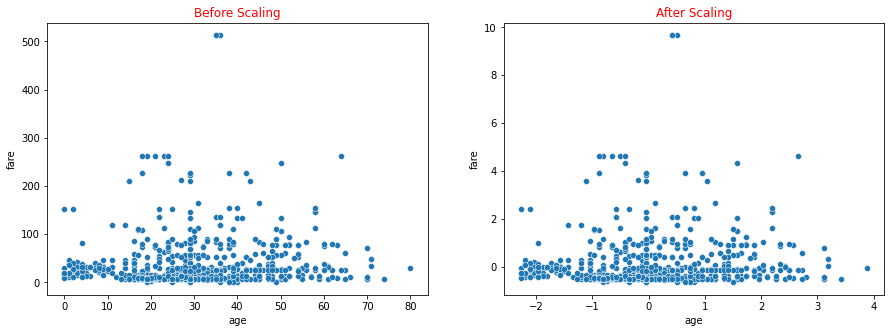

In [11]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x['age'],x['fare'])
plt.title('Before Scaling',color='red')

plt.subplot(122)
sns.scatterplot(x_scaled['age'],x_scaled['fare'])
plt.title('After Scaling',color='red')




> <span style='color:blue'>**see the above graph, there is no change in scatter point, only scaling changed(see x,y scale)**

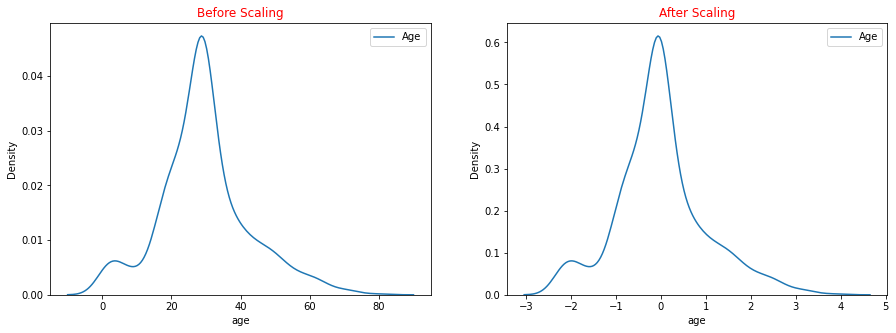

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.kdeplot(x['age'],label='Age')
# sns.kdeplot(x['fare'],label='Fare')
plt.title('Before Scaling',color='red')
plt.legend()
plt.subplot(122)
sns.kdeplot(x_scaled['age'],label='Age')
# sns.kdeplot(x_scaled['fare'],label='Fare')
plt.title('After Scaling',color='red')
plt.legend()

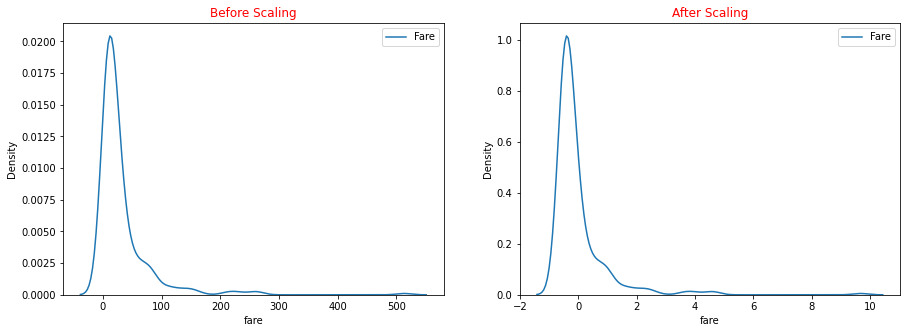

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(121)
# sns.kdeplot(x['age'],label='Age')
sns.kdeplot(x['fare'],label='Fare')
plt.title('Before Scaling',color='red')
plt.legend()
plt.subplot(122)
# sns.kdeplot(x_scaled['age'],label='Age')
sns.kdeplot(x_scaled['fare'],label='Fare')
plt.title('After Scaling',color='red')
plt.legend()

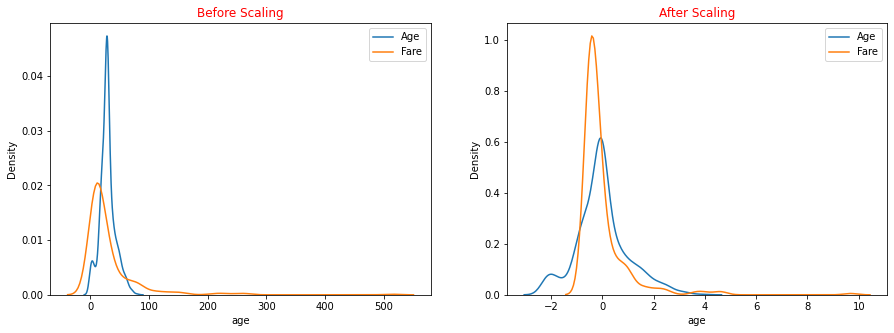

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.kdeplot(x['age'],label='Age')
sns.kdeplot(x['fare'],label='Fare')
plt.title('Before Scaling',color='red')
plt.legend()
plt.subplot(122)
sns.kdeplot(x_scaled['age'],label='Age')
sns.kdeplot(x_scaled['fare'],label='Fare')
plt.title('After Scaling',color='red')
plt.legend()

# <span style='color:Red'>Effect on Outliers after applying scaling?

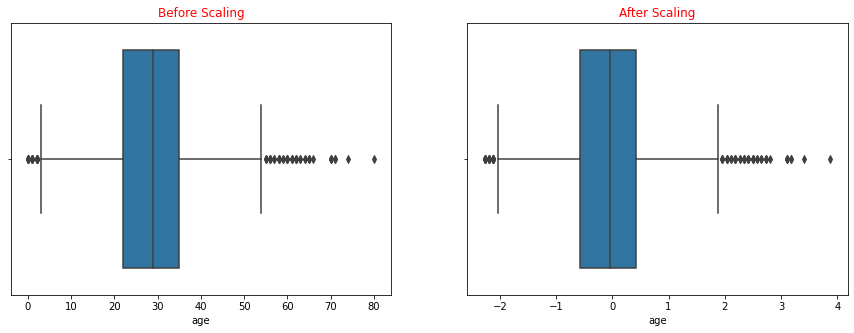

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x['age'])
plt.title('Before Scaling',color='red')

plt.subplot(122)
sns.boxplot(x_scaled['age'])
plt.title('After Scaling',color='red')
plt.show()

**<span style='color:Red'>Note:</span> Outliers are still same in scaled data. So, feature scaling can't handle outliers.
Before applying scaling, first remove outliers then apply scaling.**

# <span style='color:Red'>Where must use Standardization?</span>
> <span style='color:blue'>There is no negative result of using standardization    </span>
- Here are the some algorithms where must use standardization-
    1. K-Means
    2. KNN
    3. PCA
    4. Gradient Descent
    5. Artificial Descent
